In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
#read the training file
file_path='D://PHBS/CEF/code/MLF/HW1/GiveMeSomeCredit'

train=pd.read_csv(file_path+'/cs-training.csv')

train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
#check which column has the Nan value in the training set
train.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [4]:
labels=train.columns[2:]
print(labels)

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


In [5]:
#Get the values of y and X
y=train['SeriousDlqin2yrs'].values

df_train=train.drop(['Unnamed: 0','SeriousDlqin2yrs'],axis=1)

X=df_train.values

In [5]:
#Fill the null value by using the mean of the variable
from sklearn.impute import SimpleImputer

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(X)
X_nomiss=imr.transform(X)

In [6]:
#Standardlize the X values
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(X_nomiss)
X_nomiss_std=sc.transform(X_nomiss)

In [7]:
#Get the LR model using different parameter C, then record the coefficient
from sklearn.linear_model import LogisticRegression

weights, params=[],[]
for c in range(-5,1):
    lr = LogisticRegression(C=10.**c,random_state=1,penalty='l1',
                           solver='liblinear',multi_class='ovr')
    lr.fit(X_nomiss_std,y)
    weights.append(lr.coef_[0])
    params.append(10.**c)
   

D:\sofaware\tool\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


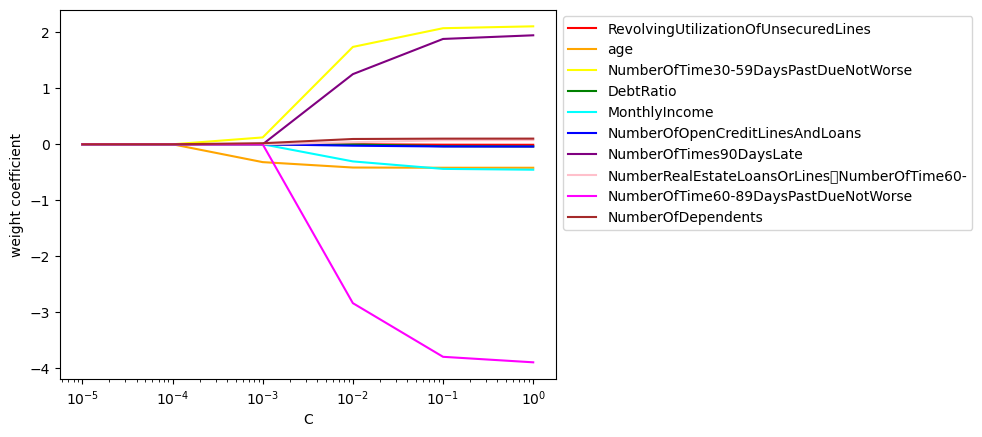

In [8]:
#Plot the figure of the change of coefficient of different variable
weights=np.array(weights)
colors=['red','orange','yellow','green','cyan',
      'blue','purple','pink','magenta','brown','black','gold']
for i in range(len(labels)):
    plt.plot(params,weights[:,i],color=colors[i],label=labels[i])


plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.xscale('log')
plt.show()

In [9]:
#Select two variables that converge to zero latest
label_need=['age','NumberOfTime30-59DaysPastDueNotWorse']

train[label_need].isnull().sum()

age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
dtype: int64

In [10]:
#Get the needed X and standardlize it
X_need=train[label_need].values

sc=StandardScaler()
sc.fit(X_need)
X_need_std=sc.transform(X_need)

In [11]:
from matplotlib.colors import ListedColormap

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

C:\Users\15303\AppData\Local\Temp\ipykernel_14644\2435705954.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


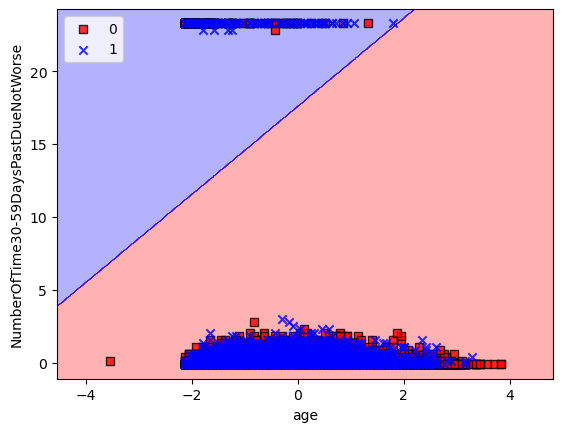

In [12]:
lr_need=LogisticRegression(C=10,random_state=1,solver='lbfgs',multi_class='ovr')
lr_need.fit(X_need_std,y)

plot_decision_regions(X_need_std,y,classifier=lr_need)
plt.xlabel('age')
plt.ylabel(label_need[1])
plt.legend(loc='upper left')

plt.show()

In [13]:
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

In [14]:
#Read the test file
test=pd.read_csv(file_path+'/cs-test.csv')

test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [15]:
#Check whether there is nan value for the variable we needed
test[label_need].isnull().sum()

age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
dtype: int64

In [16]:
#Read the actual probability which is y 
y_test=pd.read_csv(file_path+'/sampleEntry.csv')
y_test=y_test['Probability'].values
print(y_test)

#Seperate the probability into 0 and 1 as our y
y_test[y_test<0.5]=0
y_test[y_test>=0.5]=1
print(y_test)

#Get the needed X
X_test=test[label_need].values
print(X_test)

#standardlize the X
sc=StandardScaler()
sc.fit(X_test)
X_test_std=sc.transform(X_test)

[0.08080665 0.04071874 0.01196834 ... 0.00696991 0.12199356 0.04424841]
[0. 0. 0. ... 0. 0. 0.]
[[43  0]
 [57  0]
 [59  0]
 ...
 [70  0]
 [56  0]
 [29  0]]


In [17]:
from sklearn.metrics import accuracy_score

c=np.linspace(1,51,5)

#Build the LR model, predict the y and record the accuracy using different penalty C
for i in c:
    lr_pred=LogisticRegression(C=10*i,random_state=1,solver='lbfgs',multi_class='ovr')
    lr_pred.fit(X_need_std,y)
    
    
    y_pred=lr_pred.predict(X_test_std)
    accuracy=accuracy_score(y_test,y_pred)
    print("When the penalty C equals {}, the accuracy of Logistic model is {}".format(10*i,accuracy))

When the penalty C equals 10.0, the accuracy of Logistic model is 0.9836359516467493
When the penalty C equals 135.0, the accuracy of Logistic model is 0.9836359516467493
When the penalty C equals 260.0, the accuracy of Logistic model is 0.9836359516467493
When the penalty C equals 385.0, the accuracy of Logistic model is 0.9836359516467493
When the penalty C equals 510.0, the accuracy of Logistic model is 0.9836359516467493


In [18]:
#Build the decision tree model, predict the y and record the accuracy using different max_depth
for i in range(3,8):
    tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=i, 
                                    random_state=1)
    tree_model.fit(X_need_std,y)
    
    
    y_pred=tree_model.predict(X_test_std)
    accuracy=accuracy_score(y_test,y_pred)
    print("When the depth of tree equals {}, the accuracy of tree model is {}".format(i,accuracy))

When the depth of tree equals 3, the accuracy of tree model is 0.98320246692216
When the depth of tree equals 4, the accuracy of tree model is 0.98320246692216
When the depth of tree equals 5, the accuracy of tree model is 0.9822960897707457
When the depth of tree equals 6, the accuracy of tree model is 0.9839512132646325
When the depth of tree equals 7, the accuracy of tree model is 0.9833009861777484


In [ ]:
#Build the SVM model, predict the y and record the accuracy using different gamma and C

#It takes too much time, so I just train the several models
for i in range(1,5):
    for j in c:
        svm=SVC(kernel='rbf',random_state=1,gamma=0.1*i,C=10*j)
        svm.fit(X_need_std,y)
    
    
        y_pred=svm.predict(X_test_std)
        accuracy=accuracy_score(y_test,y_pred)
        print("When the gamma  equals {} and the penalty C equals {}, the accuracy of svm model is {}".format(0.1*i,10*j,accuracy))

When the gamma  equals 0.1 and the penalty C equals 10.0, the accuracy of svm model is 0.9836458035723082
When the gamma  equals 0.1 and the penalty C equals 135.0, the accuracy of svm model is 0.982936464932071
When the gamma  equals 0.1 and the penalty C equals 260.0, the accuracy of svm model is 0.9828872053042768
When the gamma  equals 0.1 and the penalty C equals 385.0, the accuracy of svm model is 0.9828872053042768
When the gamma  equals 0.1 and the penalty C equals 510.0, the accuracy of svm model is 0.9828970572298356
When the gamma  equals 0.2 and the penalty C equals 10.0, the accuracy of svm model is 0.9833798015822193
